Time series forcasting - Simple Time Series Analysis

In [2]:
#Time Series Forecast 
#https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10

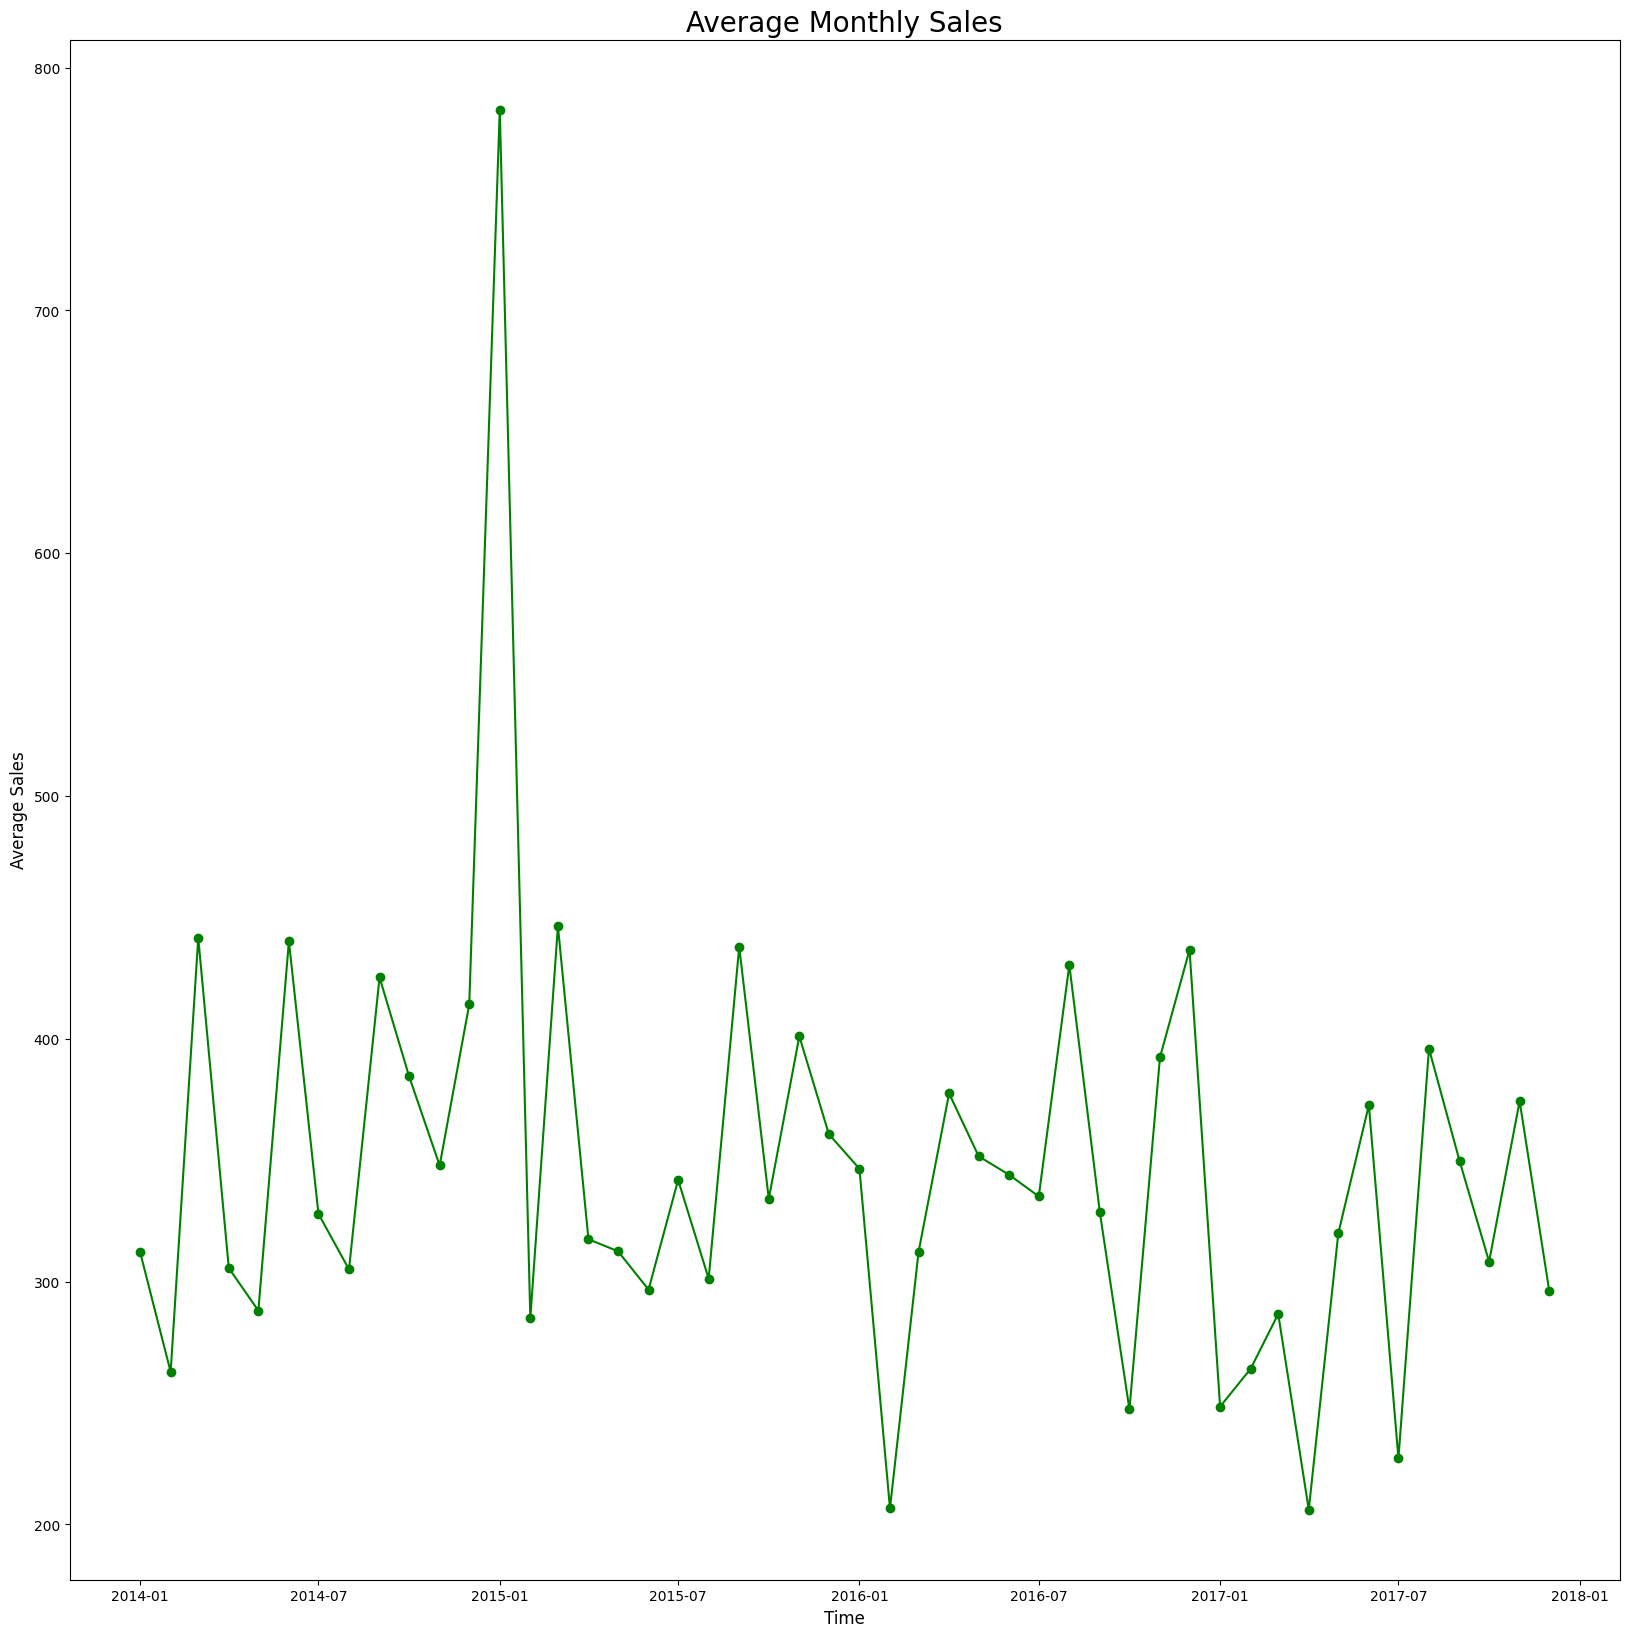

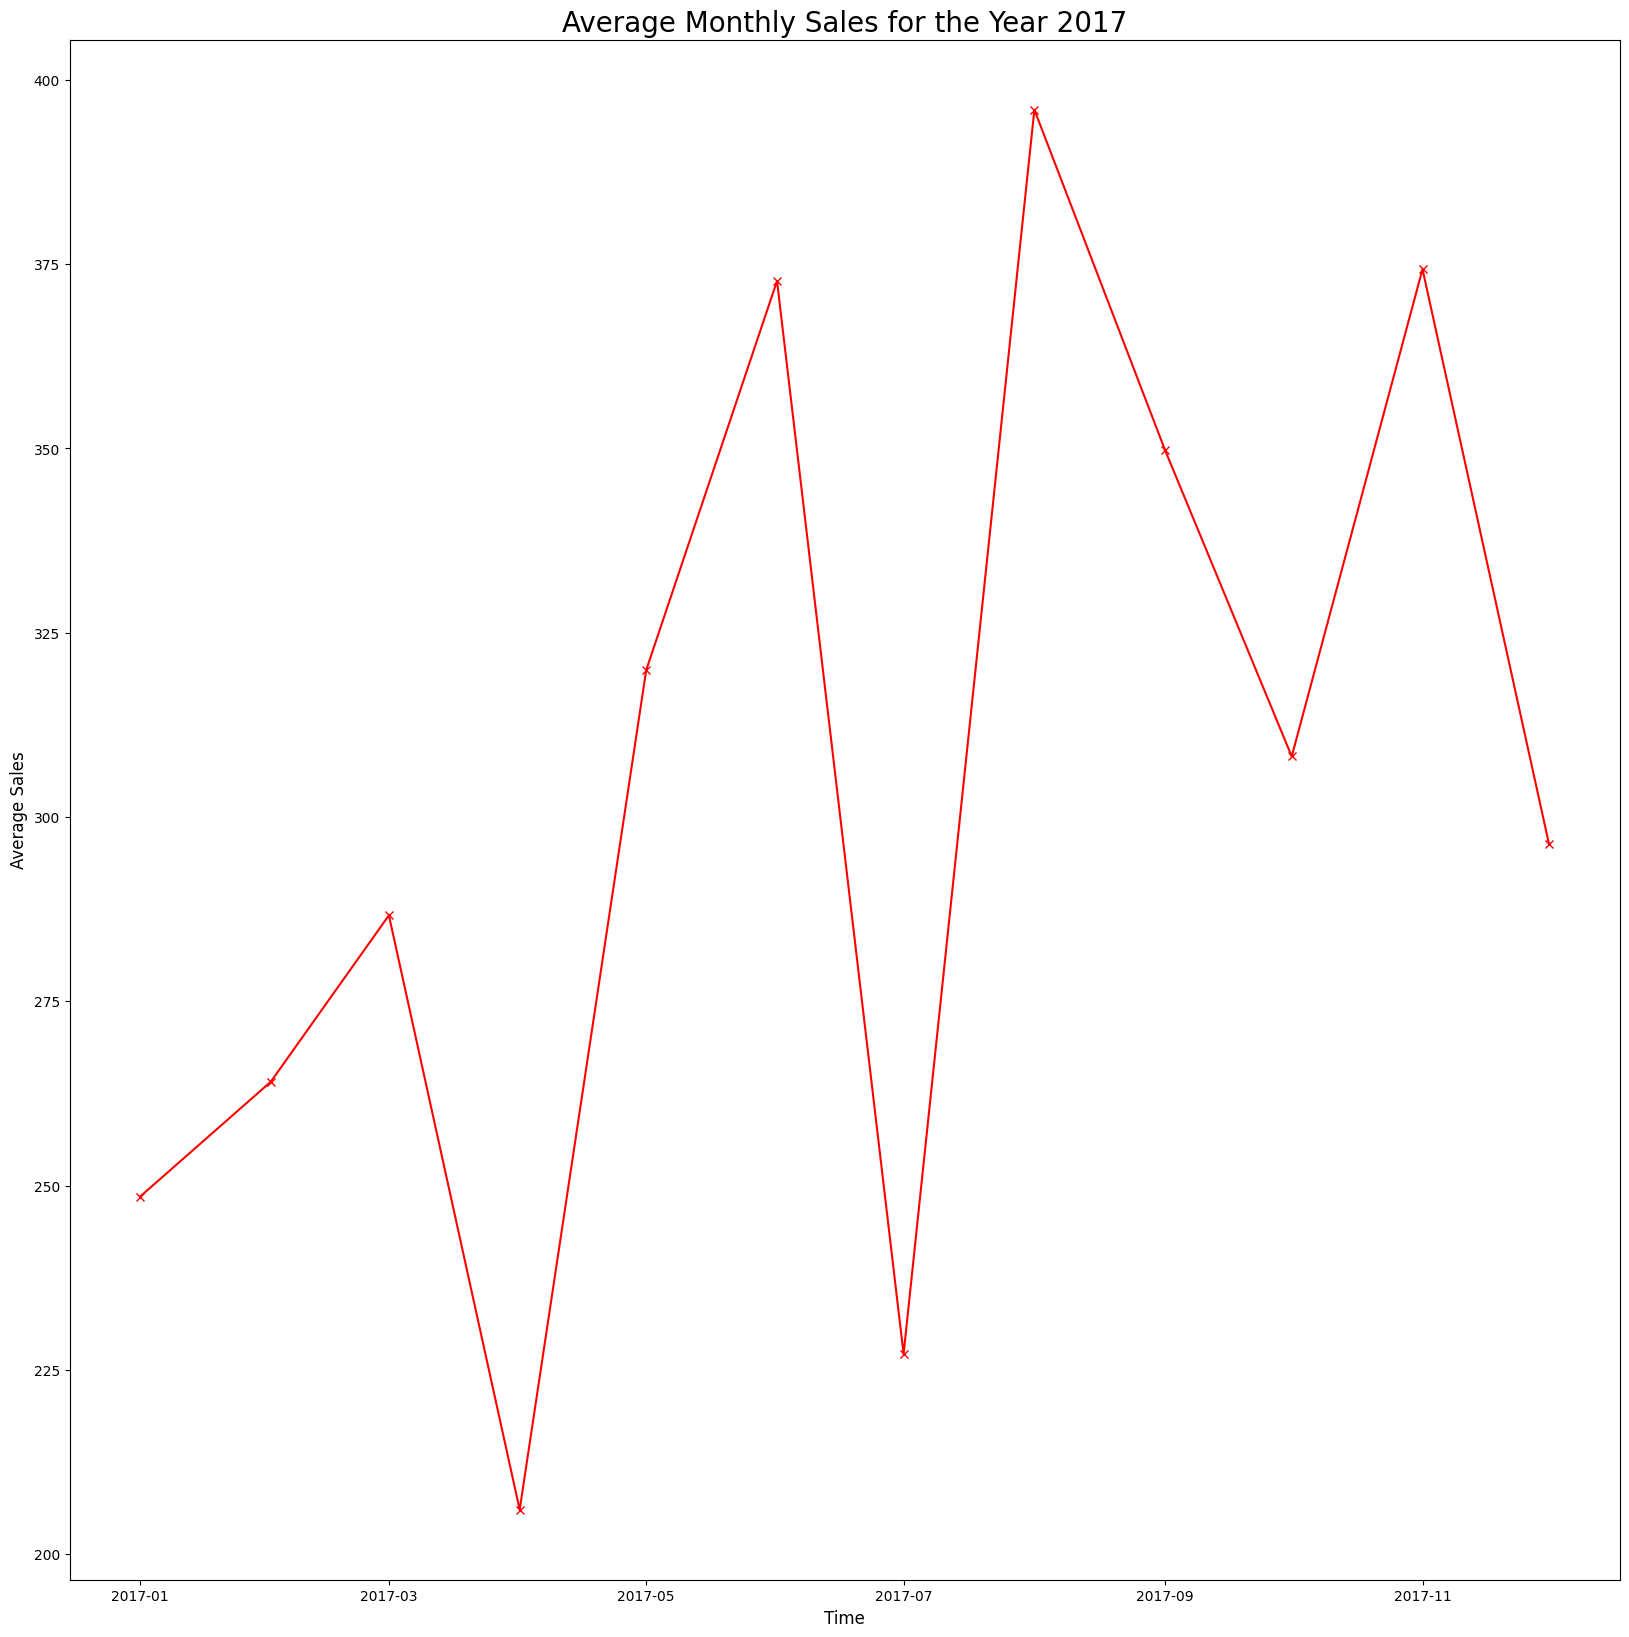

In [12]:
#load dataset and only choose category for furniture
dataset = pd.read_excel('Superstore.xls')
print(dataset.head())
print("\n")

furniture = dataset[dataset['Category'] == 'Furniture']
print(furniture.head())
print("\n")

#Find the start and end date for furniture order
print('The earliest and latest furniture order dates are: ')
print(furniture['Order Date'].min(), furniture['Order Date'].max())
print("\n")

#Check whether there is any missing data for furniture
print(furniture.isnull().sum())
print("\n")

#Index Time Series Data, Order Date
furniture = furniture.set_index('Order Date')
print("index---------------------", furniture.index)
print("\n")

#We shall obtain the average sales for each month (MS)
month_average = furniture['Sales'].resample('MS').mean()

#Only 2017 furniture sales
print("Average monthly sales in 2017", month_average['2017':])
print("\n")

#Plot the Furniture Sales Time Series Data for all the years
plt.figure(figsize=(20,20))
plt.plot(month_average, color='green', marker='o')
plt.title("Average Monthly Sales", fontsize = 20)
plt.xlabel("Time", fontsize = 12)
plt.ylabel("Average Sales", fontsize = 12)
plt.show()
 
#Plot the Furniture Sales Time Series Data for only 2017
plt.figure(figsize=(20,20))
plt.plot(month_average['2017':], color='red', marker='x')
plt.title("Average Monthly Sales for the Year 2017", fontsize = 20)
plt.xlabel("Time", fontsize = 12)
plt.ylabel("Average Sales", fontsize = 12)
plt.show()


We can also visualise our data using a method called time-series decomposition that allows us to decompose our time series into three distinct components: trend, seasonality, and noise (residual).

DatetimeIndex(['2016-11-08', '2016-11-08', '2015-10-11', '2014-06-09',
               '2014-06-09', '2017-07-16', '2015-09-25', '2015-09-17',
               '2015-09-17', '2016-12-08',
               ...
               '2015-11-13', '2016-06-03', '2016-12-12', '2017-06-01',
               '2015-12-14', '2015-03-19', '2016-12-05', '2015-09-06',
               '2014-01-21', '2017-02-26'],
              dtype='datetime64[ns]', name='Order Date', length=2121, freq=None)




<Figure size 2000x2000 with 0 Axes>

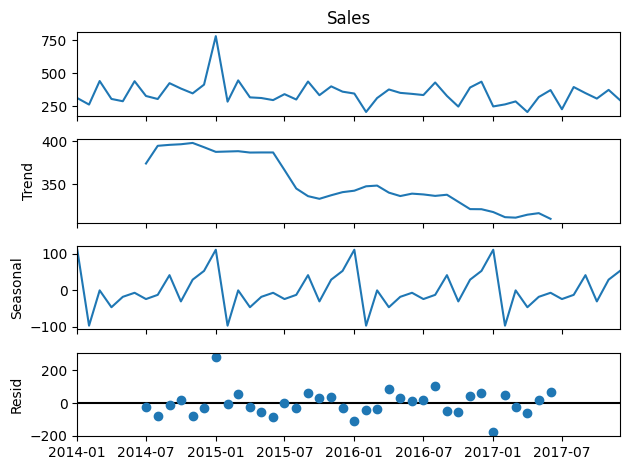

In [10]:
#https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b
#Decomposition of time series into components:
#trends, seasonality, noise
#load dataset and only choose category for furniture
dataset = pd.read_excel('Superstore.xls')
furniture = dataset[dataset['Category'] == 'Furniture']

#Index Time Series Data, Order Date
furniture = furniture.set_index('Order Date')
print(furniture.index)
print("\n")

#We shall obtain the average sales for each month (MS)
month_average = furniture['Sales'].resample('MS').mean()

#Plot the Furniture Sales Time Series Data for all the years
plt.figure(figsize=(20,20))
decomposition = sm.tsa.seasonal_decompose(month_average, model='additive')
fig = decomposition.plot()
plt.show()
